In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Opdracht 1

Text(0, 0.5, 'KM')

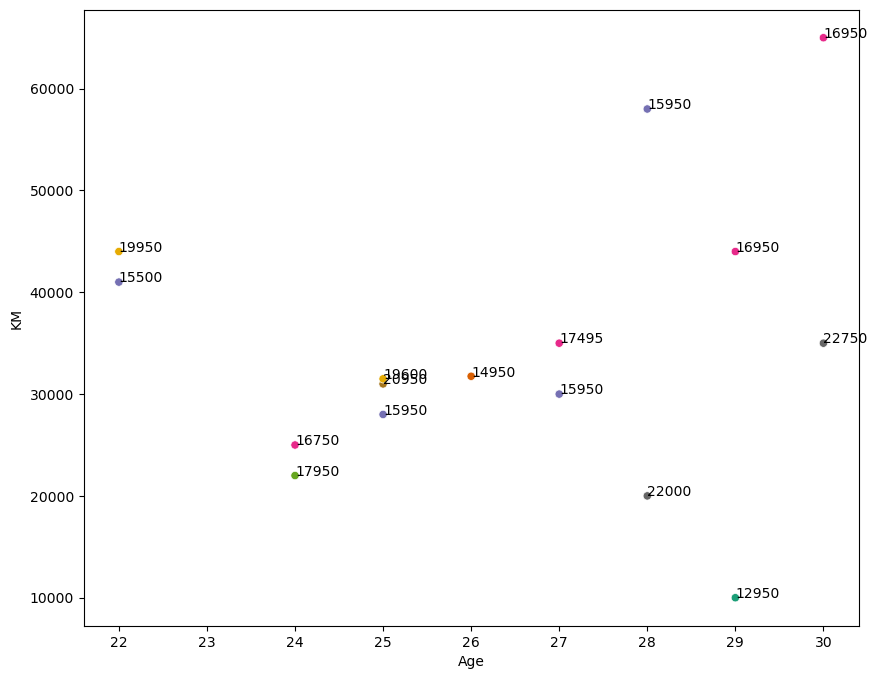

In [17]:
X = np.array([
    [22, 41000],
    [22, 44000],
    [24, 22000],
    [24, 25000],
    [25, 28000],
    [25, 31000],
    [25, 31500],
    [26, 31750],
    [27, 30000],
    [27, 35000],
    [28, 20000],
    [28, 58000],
    [29, 10000],
    [29, 44000],
    [30, 35000],
    [30, 65000],
])

Y = np.array([
    15500, 
    19950, 
    17950, 
    16750, 
    15950, 
    20950, 
    19600, 
    14950, 
    15950, 
    17495,
    22000,
    15950,
    12950,
    16950,
    22750,
    16950
])

fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=Y, cmap='Dark2', ax=ax)
for i in range(X.shape[0]):
    ax.annotate(Y[i], (X[i, 0], X[i, 1]))
ax.set_xlabel("Age")
ax.set_ylabel("KM")

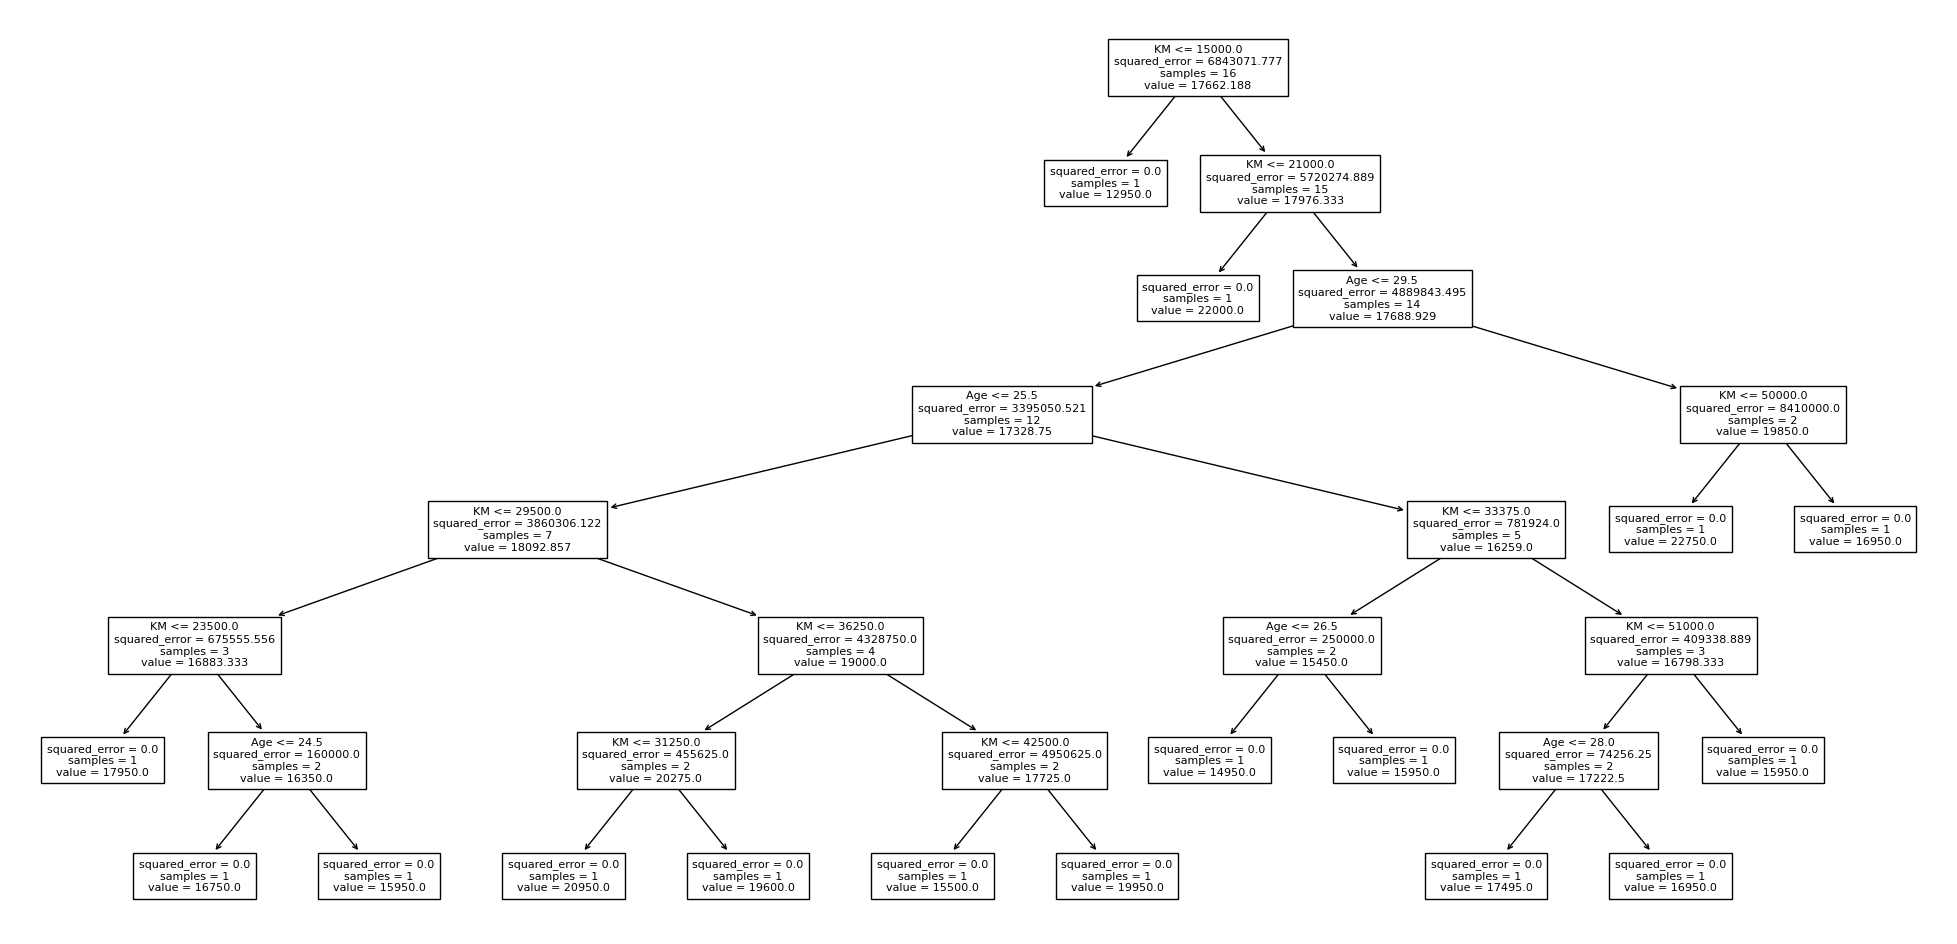

In [20]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor().fit(X, Y)
plt.figure(figsize=(25,12))
plot_tree(dt, fontsize=8, feature_names=['Age', 'KM'])
plt.show()

/usr/lib/python3.11/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'figsize'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


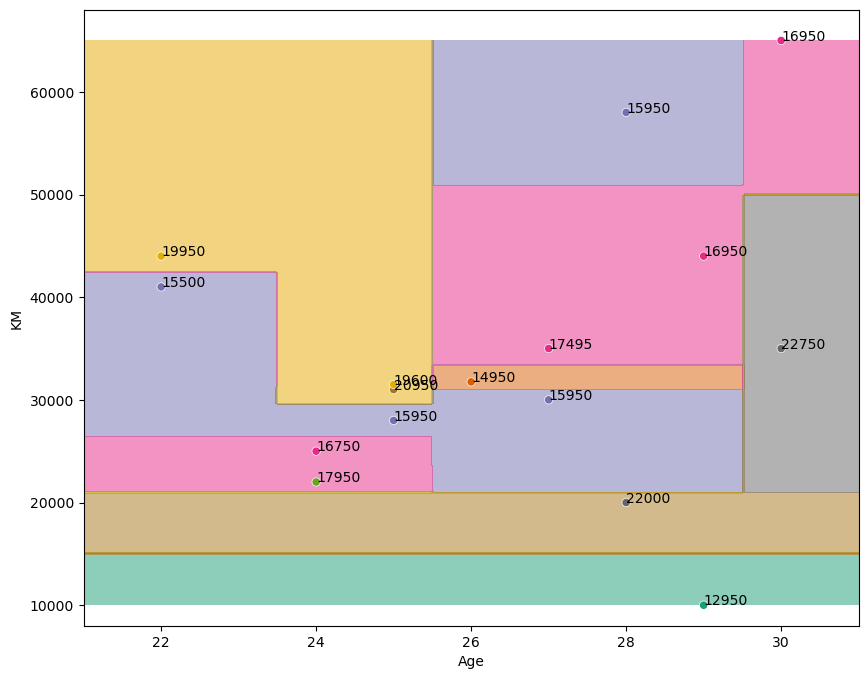

In [4]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim((21, 31))
ax.set_ylim((8000, 68000))
DecisionBoundaryDisplay.from_estimator(
    dt, 
    X,
    xlabel='Age',
    ylabel='KM', 
    ax=ax, 
    grid_resolution=300,
    cmap='Dark2',
    alpha=0.5,
    figsize=(10,5)
)
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=Y, cmap='Dark2', ax=ax)
for i in range(X.shape[0]):
    ax.annotate(Y[i], (X[i, 0], X[i, 1]))

Merk op:
- iedere node is `decision node` of `leaf node`
- iedere `decision node` $m$ heeft een test functie, e.g., $f_m(X): X \leq w_{m0}$, waarbij $w_{m0}$ de threshold is
- de lijn $w_{m0}$ staat altijd **loodrecht** op een van de assen
- decision nodes in regressiebomen hebben altijd twee branches (true/false branch)
- classificatie bomen hebben **in theorie** $n$ branches wanneer een feature $n$ waardes kan aannemen

## Opdracht 2

Gegeven een categorische feature met 3 classes: $A, B, C$, hoeveel splits zijn er?
\begin{align*}
    &\{A\} \qquad \{B, C\}\\
    &\{B\} \qquad \{A, C\}\\
    &\{C\} \qquad \{B, A\}\\
    &\varnothing \qquad \{A, B, C\}
\end{align*}

**Algemeen**: Voor iedere set met $N$ elementen geldt dat er $2^N$ mogelijke splits zijn. Waarom?

Bij decision trees, gebruik $2^{N-1}$ omdat je niet kan splitten op de lege verzameling $\varnothing$

In [5]:
df = pd.DataFrame(['A', 'B', 'B', 'C', 'A', 'A'], columns=['Job_type'])

pd.get_dummies(df)

,Job_type_A,Job_type_B,Job_type_C
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0
5,1,0,0


In theorie gebruiken we categorische variabelen in decision trees met test functie
$$
    f_m(X): X = c_i \qquad \text{waarbij }c_i \in C_{X}
$$
Echter in de praktijk (sklearn), gebruiken we numerieke waarden (dummies/one-hot).

**Let op**: het is niet de bedoeling om de numerieke encoding verder te verwerken met bijv. PCA


## Opdracht 3

Stel we gaan een split maken op basis van `KM <= 15000` 

In [6]:
split1 = X[:, 1] <= 15000
split1, split1 * Y

(array([False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False]),
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 12950,     0,     0,     0]))

Voorspelling van decision node $m$ met test functie $f_m(X)$:
$$
    \overline{y}_m = \dfrac{\sum_i f_m(x_i) y_i}{\sum_i f_m(x_i)}
$$
Met andere woorden voorspelling $\overline{y}_m$ is het gemiddelde van de data punten die door de beslissingstest zijn gekomen 

In [7]:
y_m = np.sum(split1 * Y)/np.sum(split1)
y_m

12950.0

Mean squared error (MSE) van decision node $m$:
$$
    E_m = \dfrac{1}{\sum_i f_m(x_i)} \sum_i (y_i - \overline{y}_m)^2 f_m(x_i)
$$

In [8]:
MSE = np.sum((Y - y_m)**2 * split1)/np.sum(split1)
MSE

0.0

De MSE is 0, dus goede split! Maar waarom is deze split zo goed?

Wat als we een andere split nemen, bijv: `AGE <= 23`

In [9]:
split2 = X[:, 0] <= 23
split2, split2 * Y

(array([ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([15500, 19950,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]))

In [10]:
y_m = np.sum(split2 * Y)/np.sum(split2)
y_m

17725.0

In [11]:
MSE = np.sum((Y - y_m)**2 * split2)/np.sum(split2)
MSE

4950625.0

Visueel is dit ook te zien

/usr/lib/python3.11/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'figsize'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


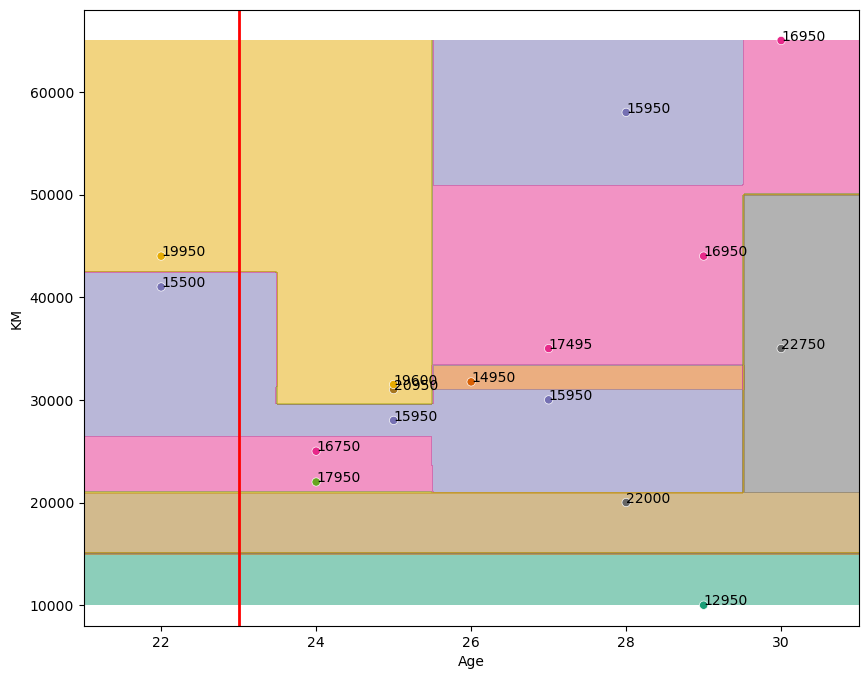

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim((21, 31))
ax.set_ylim((8000, 68000))
DecisionBoundaryDisplay.from_estimator(
    dt, 
    X,
    xlabel='Age',
    ylabel='KM', 
    ax=ax, 
    grid_resolution=300,
    cmap='Dark2',
    alpha=0.5,
    figsize=(10,5)
)
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=Y, cmap='Dark2', ax=ax)
for i in range(X.shape[0]):
    ax.annotate(Y[i], (X[i, 0], X[i, 1]))
ax.axvline(x=23, c='r', linewidth=2.0)

Dit process automatiseren en vervolgens de split kiezen met de kleinste MSE

In [13]:
unique_kms = np.unique(X[:, 0])
unique_ages = np.unique(X[:, 1])

# Alle mogelijke split waardes + feature index
thresholds = np.hstack([
    [unique_kms, [0]*unique_kms.shape[0]], 
    [unique_ages, [1]*unique_ages.shape[0]]
]).T

thresholds

array([[   22,     0],
       [   24,     0],
       [   25,     0],
       [   26,     0],
       [   27,     0],
       [   28,     0],
       [   29,     0],
       [   30,     0],
       [10000,     1],
       [20000,     1],
       [22000,     1],
       [25000,     1],
       [28000,     1],
       [30000,     1],
       [31000,     1],
       [31500,     1],
       [31750,     1],
       [35000,     1],
       [41000,     1],
       [44000,     1],
       [58000,     1],
       [65000,     1]])

In [15]:
best_MSE = np.inf
best_params = None

for w0, i in thresholds:
    split = X[:, i] <= w0                               # Test function
    y_m = np.sum(split * Y)/np.sum(split)               # Voorspelling van split
    MSE = np.sum((Y - y_m)**2 * split)/np.sum(split)    # Error van voorspelling 
    if MSE < best_MSE:                                  # optimalisatie
        best_MSE = MSE
        best_params = (w0, i)

best_MSE, best_params

(0.0, (10000, 1))

Note: merk op dat in onze implementatie w0 = 10000, terwijl sklearn's regressieboom een waarde van 15000 gaf.
- Onze implementatie hanteert de meest specifieke hypothese $S$
- De meest generieke hypothese $G$ zou zoveel mogelijk ruimte overlaten tussen de beslisgrenzen
- Sklearn hanteert een middenweg door (lage grens + hoge grens)/2
- e.g., $(10000+20000)/2 = 15000$
- Hiermee verhoogt de margin van waarschijnlijkheid op beslissingen 

![image info](./output-figure11-1.png)